# Goal

Our goal for today is to understand how we can do edge detection in grayscale images using convolutions:

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

In [0]:
benedict_path = "http://www.evanlray.com/stat344ne_s2020/homework/hw1/benedict.jpg"
benedict = np.array(imageio.imread(benedict_path))[50:1250, 75:1275, :]
benedict_grayscale = np.mean(benedict, axis = 2).astype(int)
print(benedict_grayscale.shape)

(1200, 1200)


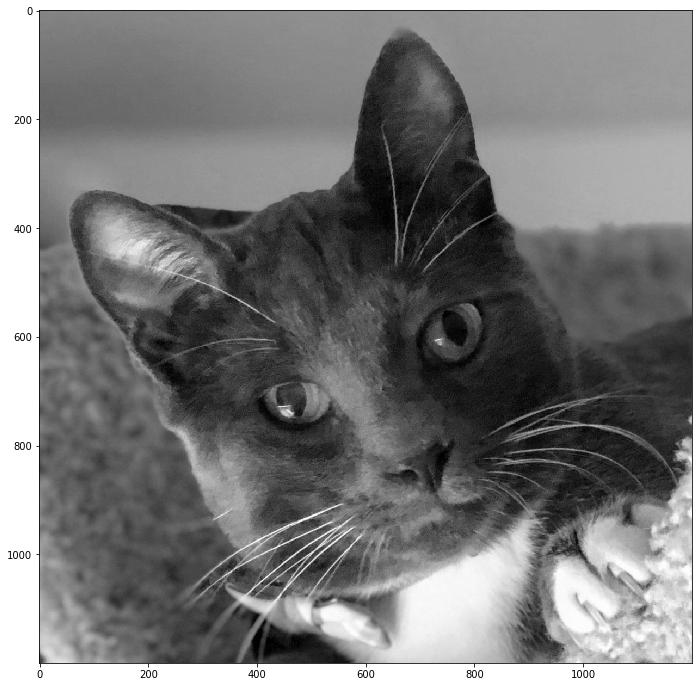

In [0]:
fig, ax = plt.subplots(1, 1, figsize = (12, 12))
ax.imshow(benedict_grayscale, cmap = "gray")

In [0]:
def zero_pad(X, pad):
    """
    Pad with zeros all images of the dataset X. The padding is applied to the height and width of an image, 
    as illustrated in Figure 1.
    
    Argument:
    X -- python numpy array of shape (m, n_H, n_W, n_C) representing a batch of m images
    pad -- integer, amount of padding around each image on vertical and horizontal dimensions
    
    Returns:
    X_pad -- padded image of shape (m, n_H + 2*pad, n_W + 2*pad, n_C)
    """
    
    ### START CODE HERE ### (≈ 1 line)
    X_pad = np.pad(X, ((0,0), (pad,pad), (pad,pad), (0,0)), mode='constant', constant_values = (0,0))
    ### END CODE HERE ###
    
    return X_pad

def conv_single_step(a_slice_prev, W, b):
    """
    Apply one filter defined by parameters W on a single slice (a_slice_prev) of the output activation 
    of the previous layer.
    
    Arguments:
    a_slice_prev -- slice of input data of shape (f, f, n_C_prev)
    W -- Weight parameters contained in a window - matrix of shape (f, f, n_C_prev)
    b -- Bias parameters contained in a window - matrix of shape (1, 1, 1)
    
    Returns:
    Z -- a scalar value, the result of convolving the sliding window (W, b) on a slice x of the input data
    """

    ### START CODE HERE ### (≈ 2 lines of code)
    # Element-wise product between a_slice_prev and W. Do not add the bias yet.
    s = a_slice_prev * W
    # Sum over all entries of the volume s.
    Z = np.sum(s)
    # Add bias b to Z. Cast b to a float() so that Z results in a scalar value.
    Z = Z + float(b)
    ### END CODE HERE ###

    return Z



def conv_forward(A_prev, W, b, hparameters):
    """
    Implements the forward propagation for a convolution function
    
    Arguments:
    A_prev -- output activations of the previous layer, 
        numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    W -- Weights, numpy array of shape (f, f, n_C_prev, n_C)
    b -- Biases, numpy array of shape (1, 1, 1, n_C)
    hparameters -- python dictionary containing "stride" and "pad"
        
    Returns:
    Z -- conv output, numpy array of shape (m, n_H, n_W, n_C)
    cache -- cache of values needed for the conv_backward() function
    """
    
    ### START CODE HERE ###
    # Retrieve dimensions from A_prev's shape (≈1 line)  
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Retrieve dimensions from W's shape (≈1 line)
    (f, f, n_C_prev, n_C) = W.shape
    
    # Retrieve information from "hparameters" (≈2 lines)
    stride = hparameters["stride"]
    pad = hparameters["pad"]
    
    # Compute the dimensions of the CONV output volume using the formula given above. 
    # Hint: use int() to apply the 'floor' operation. (≈2 lines)
    n_H = int((n_H_prev + 2*pad - f) / stride) + 1
    n_W = int((n_W_prev + 2*pad - f) / stride) + 1
    
    # Initialize the output volume Z with zeros. (≈1 line)
    Z = np.zeros((m, n_H, n_W, n_C))
    
    # Create A_prev_pad by padding A_prev
    A_prev_pad = zero_pad(A_prev, pad)
    
    for i in range(m):               # loop over the batch of training examples
        a_prev_pad = A_prev_pad[i, :]  # Select ith training example's padded activation
        for h in range(n_H):           # loop over vertical axis of the output volume
            # Find the vertical start and end of the current "slice" (≈2 lines)
            vert_start = h * stride
            vert_end = h * stride + f
            
            for w in range(n_W):       # loop over horizontal axis of the output volume
                # Find the horizontal start and end of the current "slice" (≈2 lines)
                horiz_start = w * stride
                horiz_end = w * stride + f
                
                for c in range(n_C):   # loop over channels (= #filters) of the output volume
                                        
                    # Use the corners to define the (3D) slice of a_prev_pad (See Hint above the cell). (≈1 line)
                    a_slice_prev = a_prev_pad[vert_start:vert_end,horiz_start:horiz_end,:]
                    
                    # Convolve the (3D) slice with the correct filter W and bias b, to get back one output neuron. (≈3 line)
                    weights = W[:, :, :, c]
                    biases = b[:, :, :, c]
                    Z[i, h, w, c] = conv_single_step(a_slice_prev, weights, biases)
                                        
    ### END CODE HERE ###
    
    # Making sure your output shape is correct
    assert(Z.shape == (m, n_H, n_W, n_C))
    
    # Save information in "cache" for the backprop
    cache = (A_prev, W, b, hparameters)
    
    return Z, cache


In [0]:
W = np.array([[1, 0, -1],
                   [2, 0, -2],
                   [1, 0, -1]])
W = W.reshape((3,3,1,1))
W.shape

(3, 3, 1, 1)

In [0]:
(benedict_filtered, _) = conv_forward(benedict_grayscale[np.newaxis, :, :, np.newaxis], W = W, b = np.array([[[[0]]]]), hparameters = {
  'stride': 1,
  'pad': 1
})
benedict_filtered = benedict_filtered[0,:,:,0]

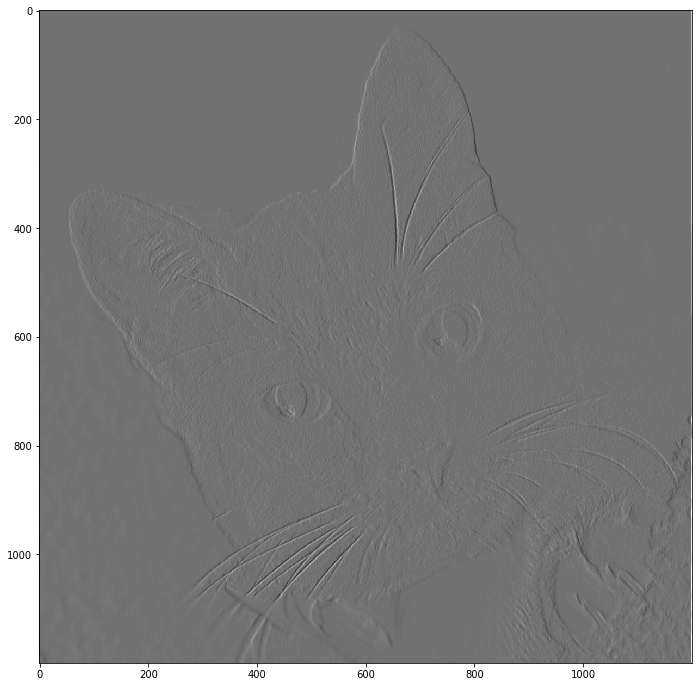

In [0]:
fig, ax = plt.subplots(1, 1, figsize = (12, 12))
ax.imshow(benedict_filtered, cmap = "gray")

# Simplified setting: 1 dimensional input

Suppose we have the following very fake data:

x = [0. 0. 0. 1. 1. 1. 0. 0. 0.]


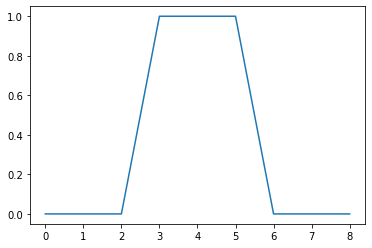

In [53]:
x = np.concatenate(
    (np.zeros((3,)), np.ones((3,)), np.zeros((3,))),
    axis = 0
)
print("x = " + str(x))
plt.plot(x)

We would like to detect the edges between indices 2 and 3, and between indices 5 and 6.

## (a) How to do this with a convolutional filter.

### i. Filter width $f = 3$: W = [1, 0, -1]


### ii. Filter width $f = 5$: W = [1, 1, 0, 1, 1]

## (b) Suppose we have an input of length $n$ and a filter of length $f$.  What is the shape of the output?

## (c) Suppose we *pad* the input by adding $p$ 0's on the left and $p$ zeros on the right.

### i. Example calculation with $p = 1$, $f = 5$

### ii. What is the length of the output in terms of $n$, $p$, and $f$?

### iii. What value of $p$ should you use to get a "*same*" convolution where the length of the output is the same as the length of the input?

## (d) Suppose we use a *stride* of $s$ (the starting point of each new filter evaluation skips over $s$ inputs).

### i. Example calculation with $p = 1$, $f = 3$, $s = 2$

### ii. What if our input was of length 8 instead of 9?  (Suppose x = [0. 0. 0. 1. 1. 0. 0. 0.] -- I deleted a 1 in the middle.)

### iii. What is the length of the output in terms of $n$, $p$, $f$, and $s$?

# Two-dimensional input

Recall that a greyscale image is represented as a 2-dimensional array of pixel values.  Let's denote the shape by $(n_H, n_W)$ (for height and width, corresponding to rows and columns).

Let's pretend that we have the following pixel values (these will be integers between 0 and 255, inclusive):

\vspace{1cm}

$$X = \qquad \begin{bmatrix}
100 & 100 & 100 & 0 & 0 & 0 \\ 
100 & 100 & 100 & 0 & 0 & 0 \\ 
100 & 100 & 100 & 100 & 100 & 100 \\ 
100 & 100 & 100 & 100 & 100 & 100 \\ 
\end{bmatrix}$$

We use the following filter:

$$W = \qquad \begin{bmatrix}
1 & 0 & -1 \\
2 & 0 & -2 \\
1 & 0 & -1 \\
\end{bmatrix}$$

## (a) Find the filter output if we use a padding of p = 1 and stride of $s = 1$.

## (b) What does this filter do?


## (c) What is the shape of the output from applying an $f \times f$ filter to an $n_H \times n_W$ image using padding $p$ and stride $s$?

# Second Example with 2-dimensional input

Suppose

$$X = \qquad \begin{bmatrix}
100 & 100 & 100 & 0 & 0 & 0 \\ 
100 & 100 & 100 & 0 & 0 & 0 \\ 
100 & 100 & 100 & 0 & 0 & 0 \\ 
0 & 0 & 0 & 100 & 100 & 100 \\ 
0 & 0 & 0 & 100 & 100 & 100 \\ 
\end{bmatrix}$$

We use the following filter:

$$W = \qquad \begin{bmatrix}
1 & 1 & 1 \\
0 & 0 & 0 \\
-1 & -1 & -1 \\
\end{bmatrix}$$

## (a) What is the shape of the output from applying the filter $W$ to $X$ using a padding of $p=1$ and a stride of $s = 0$?

## (b) What does this filter do?



# Algorithm to compute

We will make some tweaks to this next week to allow for multiple observations (multiple images) and color images with red, green, and blue channels.

Inputs:

 * Array $A$ of shape $(n_H, n_W)$ to apply the filter to.  (In examples above, we used $X$ -- this is what we would use in the first layer of a convolutional network, later layers will use activations A from previous layers)
 * Filter of shape $(f, f)$
 * Padding amount $p$
 * Stride amount $s$

Outputs:

 * Filtered inputs of shape $\left(\left\lfloor \frac{n_H + 2p - f}{s} + 1 \right\rfloor, \left\lfloor \frac{n_W + 2p - f}{s} + 1 \right\rfloor\right)$

Algorithm:

 * Pad image with $p$ pixels of 0s on all sides.
 * Create output array of shape $\left(\left\lfloor \frac{n_H + 2p - f}{s} + 1 \right\rfloor, \left\lfloor \frac{n_W + 2p - f}{s} + 1 \right\rfloor\right)$
 * For i = 0, ..., $\left\lfloor \frac{n_H + 2p - f}{s} + 1 \right\rfloor$
    * For j = 0, ..., $\left\lfloor \frac{n_W + 2p - f}{s} + 1 \right\rfloor$
        * start_row = i * s, end_row = start_row + f
        * start_col = j * s, end_col = start_col + f
        * output[i, j] = np.sum(W * A[start_row:end_row, start_col:end_col])